In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
data=pd.read_csv('car_data.csv')

Data shape, describe, info

In [89]:
data.head(10)

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,...,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN
4,0,36000,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN
5,0,25000,AZN,Bakı,Mercedes,E 200,2007,Sedan,Gümüşü,1.8 L/184 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1141,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Avtomobil Almaniyadan yeni gelib. Ideal veziyy...,NaN,Avropa,NaN,NaN
6,0,27900,AZN,Bakı,Chevrolet,Equinox,2017,Offroader / SUV,Tünd qırmızı,1.5 L/170 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",26.05.2023,128,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Azerbaycana yeni gelib hec bir xerc teleb etmi...,1,Amerika,5,NaN
7,0,13400,AZN,Bakı,Opel,Astra,2009,Hetçbek,Boz,1.4 L/90 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1282,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",Almanyadan yeni gelib Gömrük olnub nömre alnib...,NaN,NaN,NaN,NaN
8,0,26500,USD,Bakı,BMW,520,2016,Sedan,Göy,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",26.05.2023,9807,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Masin idial veziyyetdedi hec bir prablemi yoxd...,NaN,Koreya,5,NaN
9,0,13500,AZN,Bakı,Chevrolet,Cruze,2012,Sedan,Ağ,1.6 L/124 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,6478,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",MAŞIN ÇOX TƏCİLİ SATILIR!!! Maşın rəsmi servis...,1,Rəsmi diler,4,NaN


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Avtosalon                 10000 non-null  int64 
 1   Qiymet                    10000 non-null  int64 
 2   Valyuta                   10000 non-null  object
 3   Şəhər                     10000 non-null  object
 4   Marka                     10000 non-null  object
 5   Model                     10000 non-null  object
 6   Buraxılış ili             10000 non-null  int64 
 7   Ban növü                  10000 non-null  object
 8   Rəng                      10000 non-null  object
 9   Mühərrik                  10000 non-null  object
 10  Yürüş                     10000 non-null  object
 11  Sürətlər qutusu           10000 non-null  object
 12  Ötürücü                   10000 non-null  object
 13  Yeni                      10000 non-null  object
 14  Vəziyyəti              

In [92]:
data.describe()

,Avtosalon,Qiymet,Buraxılış ili,Baxışların sayı
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.25370,27318.521400,2010.067900,4328.818800
std,0.43515,28995.789851,8.386246,13383.511716
min,0.00000,1100.000000,1938.000000,41.000000
25%,0.00000,12700.000000,2006.000000,408.750000
50%,0.00000,21000.000000,2011.000000,1164.500000
75%,1.00000,32500.000000,2015.000000,3500.250000
max,1.00000,850000.000000,2023.000000,334547.000000


In [93]:
data.shape

(10000, 23)

Data Cleaning and Preprocessing

In [94]:
data.isnull().sum()

,0
Avtosalon,0
Qiymet,0
Valyuta,0
Şəhər,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0


Data same columns dropped

In [95]:
data = data.drop(columns = ['Qəzalı', 'Yeniləndi', 'Yeni', 'Baxışların sayı', 'Avtosalon','Etrafli','Sahiblər','Şəhər'])

In [96]:
data.columns

Index(['Qiymet', 'Valyuta', 'Marka', 'Model', 'Buraxılış ili', 'Ban növü',
       'Rəng', 'Mühərrik', 'Yürüş', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti',
       'Extra', 'Hansı bazar üçün yığılıb', 'Yerlərin sayı'],
      dtype='object')

In [97]:
data['Mühərrik'].value_counts()

,count
Mühərrik,
2.0 L/184 a.g./Dizel,503
1.6 L/75 a.g./Benzin,321
2.0 L/245 a.g./Benzin,265
1.5 L/76 a.g./Hibrid,180
1.4 L/90 a.g./Benzin,169
...,...
1.5 L/152 a.g./Benzin,1
1.9 L/125 a.g./Dizel,1
1.3 L/90 a.g./Hibrid,1


In [99]:
# Split only engine volume and fuel type
data[["Motor_Hecmi", "Yanacaq_Novu"]] = data["Mühərrik"].str.extract(r"(\d+\.\d+)\s*L/\d+\s*a\.g\./(.+)")

data["Motor_Hecmi"] = data["Motor_Hecmi"].astype(float)
data["Yanacaq_Novu"] = data["Yanacaq_Novu"].str.strip()

data.drop(columns=["Mühərrik"], inplace=True)

KeyError: 'Mühərrik'

In [100]:
data["Yerlərin sayı"].value_counts()

,count
Yerlərin sayı,
5,4372
7,1194
4,831
3,187
2,115
8+,74
6,40
1,19


In [102]:
data["Yerlərin sayı"] = data["Yerlərin sayı"].replace("8+", 8)

data["Yerlərin sayı"] = data["Yerlərin sayı"].astype(float)

In [103]:
train_data = data[data["Yerlərin sayı"].notna()]
test_data = data[data["Yerlərin sayı"].isna()]

In [104]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(train_data[["Motor_Hecmi"]], train_data["Yerlərin sayı"])

DecisionTreeRegressor(random_state=42)

In [105]:
predicted = model.predict(test_data[["Motor_Hecmi"]])
predicted_rounded = np.round(predicted)

data.loc[test_data.index, "Yerlərin sayı"] = predicted_rounded

In [106]:
data["Yerlərin sayı"].value_counts()

,count
Yerlərin sayı,
5.0,7114
7.0,1246
4.0,851
6.0,313
3.0,205
2.0,176
8.0,76
1.0,19


In [107]:
percent_distribution = data["Yerlərin sayı"].value_counts(normalize=True) * 100
print(percent_distribution)

Yerlərin sayı
5.0    71.14
7.0    12.46
4.0     8.51
6.0     3.13
3.0     2.05
2.0     1.76
8.0     0.76
1.0     0.19
Name: proportion, dtype: float64


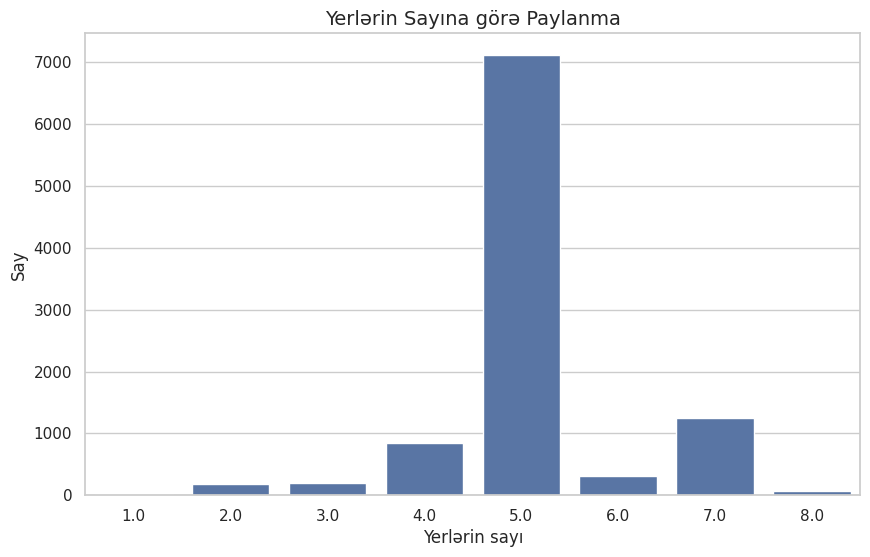

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Yerlərin sayı", order=sorted(data["Yerlərin sayı"].unique()))
plt.title("Yerlərin Sayına görə Paylanma", fontsize=14)
plt.xlabel("Yerlərin sayı", fontsize=12)
plt.ylabel("Say", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


In [109]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [110]:
data['Vəziyyəti'].value_counts()

,count
Vəziyyəti,
"Vuruğu yoxdur, rənglənməyib",9157
"Vuruğu yoxdur, rənglənib",696
"Vuruğu var, rənglənib",73
"Vuruğu var, rənglənməyib",46


In [111]:
data = data.dropna(subset=["Vəziyyəti"])

In [112]:
data['Hansı bazar üçün yığılıb'].value_counts()

,count
Hansı bazar üçün yığılıb,
Avropa,2086
Rəsmi diler,1447
Amerika,1311
Koreya,697
Rusiya,497
Digər,381
Yaponiya,203
Dubay,79


In [113]:
data['Hansı bazar üçün yığılıb'] = data['Hansı bazar üçün yığılıb'].fillna('unknown')

<ipython-input-113-3474175481>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hansı bazar üçün yığılıb'] = data['Hansı bazar üçün yığılıb'].fillna('unknown')


In [114]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [115]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [116]:
data["Extra"].value_counts()

,count
Extra,
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr, Oturacaqların ventilyasiyası",1827
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Oturacaqların ventilyasiyası",391
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr",338
"Yüngül lehimli disklər, ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası",324
"Yüngül lehimli disklər, ABS, Yağış sensoru, Mərkəzi qapanma, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası, Yan pərdələr, Oturacaqların ventilyasiyası",324
...,...
"Lyuk, Mərkəzi qapanma, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Oturacaqların ventilyasiyası",1
"Yüngül lehimli disklər, ABS, Yağış sensoru, Park radarı, Kondisioner, Oturacaqların isidilməsi, Dəri salon, Ksenon lampalar, Arxa görüntü kamerası",1
"ABS, Mərkəzi qapanma, Oturacaqların isidilməsi, Ksenon lampalar",1


In [117]:
data['Extra'].isna().sum()

np.int64(762)

In [118]:
data["Extra"] = data["Extra"].fillna("")
print(data)

      Qiymet Valyuta       Marka        Model  Buraxılış ili         Ban növü  \
0      13500     AZN        Opel       Vectra           2000          Hetçbek   
1      23500     USD      Toyota      Corolla           2023            Sedan   
2      33200     AZN     Hyundai     Santa Fe           2013  Offroader / SUV   
3      17000     AZN        Ford       Fusion           2015            Sedan   
4      36000     USD      Toyota         RAV4           2022  Offroader / SUV   
...      ...     ...         ...          ...            ...              ...   
9995   22900     USD         BMW          528           2016            Sedan   
9996   98000     USD  Land Rover  Range Rover           2019  Offroader / SUV   
9997    9800     AZN   Chevrolet      Lacetti           2007            Sedan   
9998   17800     AZN     Hyundai       Tucson           2007  Offroader / SUV   
9999    5000     AZN  LADA (VAZ)         2107           2004            Sedan   

        Rəng       Yürüş Sü

<ipython-input-118-3303695471>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Extra"] = data["Extra"].fillna("")


In [121]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [122]:
features_lists = data['Extra'].apply(lambda x: [item.strip() for item in x.split(',')])

In [123]:
all_features = set()
for features in features_lists:
    all_features.update(features)

In [124]:
for feature in all_features:
    data[feature] = features_lists.apply(lambda x: 1 if feature in x else 0)

<ipython-input-124-922266410>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = features_lists.apply(lambda x: 1 if feature in x else 0)
<ipython-input-124-922266410>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = features_lists.apply(lambda x: 1 if feature in x else 0)
<ipython-input-124-922266410>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [125]:
def one_hot_extras(data, column='Extra'):
    data[column] = data[column].fillna('')  # Nan-ları boş stringə çevir
    features_lists = data[column].apply(lambda x: [item.strip() for item in x.split(',') if item.strip()])

    all_features = set()
    for features in features_lists:
        all_features.update(features)

    for feature in all_features:
        data[feature] = features_lists.apply(lambda x: 1 if feature in x else 0)

    return data


In [126]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Yürüş,0
Sürətlər qutusu,0
Ötürücü,0


In [127]:
data = data.dropna(subset=['Motor_Hecmi', 'Yanacaq_Novu'])

In [128]:
data.drop(columns=["Extra"], inplace=True)

In [129]:
data.shape

(9876, 29)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9876 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Qiymet                        9876 non-null   int64  
 1   Valyuta                       9876 non-null   object 
 2   Marka                         9876 non-null   object 
 3   Model                         9876 non-null   object 
 4   Buraxılış ili                 9876 non-null   int64  
 5   Ban növü                      9876 non-null   object 
 6   Rəng                          9876 non-null   object 
 7   Yürüş                         9876 non-null   object 
 8   Sürətlər qutusu               9876 non-null   object 
 9   Ötürücü                       9876 non-null   object 
 10  Vəziyyəti                     9876 non-null   object 
 11  Hansı bazar üçün yığılıb      9876 non-null   object 
 12  Yerlərin sayı                 9876 non-null   float64
 13  Motor_He

In [131]:
data.head(20)

,Qiymet,Valyuta,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,...,Mərkəzi qapanma,Park radarı,Yan pərdələr,Yüngül lehimli disklər,Ksenon lampalar,ABS,Yağış sensoru,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk
0,13500,AZN,Opel,Vectra,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,...,0,0,1,1,1,1,0,0,0,0
1,23500,USD,Toyota,Corolla,2023,Sedan,Mavi,0 km,Avtomat,Ön,...,1,1,1,1,1,1,1,1,1,0
2,33200,AZN,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,...,1,1,1,1,1,1,1,1,1,1
3,17000,AZN,Ford,Fusion,2015,Sedan,Göy,120 873 km,Avtomat,Ön,...,1,1,1,1,1,1,1,1,0,0
4,36000,USD,Toyota,RAV4,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,...,1,1,0,1,1,1,1,1,0,0
5,25000,AZN,Mercedes,E 200,2007,Sedan,Gümüşü,204 000 km,Avtomat,Arxa,...,1,1,0,1,1,1,1,0,1,1
6,27900,AZN,Chevrolet,Equinox,2017,Offroader / SUV,Tünd qırmızı,45 000 km,Avtomat,Tam,...,1,1,1,1,1,1,1,1,1,0
7,13400,AZN,Opel,Astra,2009,Hetçbek,Boz,153 896 km,Mexaniki,Ön,...,1,0,0,1,1,1,0,0,1,0
8,26500,USD,BMW,520,2016,Sedan,Göy,135 000 km,Avtomat,Arxa,...,1,1,1,1,1,1,1,1,1,1
9,13500,AZN,Chevrolet,Cruze,2012,Sedan,Ağ,150 000 km,Avtomat,Ön,...,1,0,0,1,0,1,0,1,0,0


In [132]:
def convert_usd_to_azn(data, rate=1.7):

    data.loc[data["Valyuta"] == "USD", "Qiymet"] = data.loc[data["Valyuta"] == "USD", "Qiymet"] * rate

    data.drop(columns=["Valyuta"], inplace=True)

    return data

data = convert_usd_to_azn(data)


<ipython-input-132-1997843891>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 39950.  61200.  45050. ...  51000.  38930. 166600.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Valyuta"] == "USD", "Qiymet"] = data.loc[data["Valyuta"] == "USD", "Qiymet"] * rate


In [133]:
data

,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Vəziyyəti,...,Mərkəzi qapanma,Park radarı,Yan pərdələr,Yüngül lehimli disklər,Ksenon lampalar,ABS,Yağış sensoru,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk
0,13500.0,Opel,Vectra,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",...,0,0,1,1,1,1,0,0,0,0
1,39950.0,Toyota,Corolla,2023,Sedan,Mavi,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,1,1,1,1,1,0
2,33200.0,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,1,1,1,1,1,1
3,17000.0,Ford,Fusion,2015,Sedan,Göy,120 873 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,1,1,1,1,0,0
4,61200.0,Toyota,RAV4,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,BMW,528,2016,Sedan,Qara,100 000 km,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",...,1,0,1,1,1,1,1,0,0,1
9996,166600.0,Land Rover,Range Rover,2019,Offroader / SUV,Qara,84 000 km,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",...,1,1,1,1,1,1,1,1,1,1
9997,9800.0,Chevrolet,Lacetti,2007,Sedan,Gümüşü,299 785 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,0,1,0,1,0,1,0,0
9998,17800.0,Hyundai,Tucson,2007,Offroader / SUV,Gümüşü,181 500 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",...,1,1,0,1,1,1,1,1,1,0


In [134]:
import re

def clean_yurus(val):
    if pd.isna(val): return np.nan
    val = str(val).lower().replace("km", "").replace(" ", "")
    val = val.replace(',', '.')

    match = re.search(r"[\d\.]+", val)
    if not match: return np.nan

    num = float(match.group())
    return num * 1000 if "min" in val else num

data["Yurus_Clean"] = data["Yürüş"].apply(clean_yurus)

In [135]:
data.drop(columns=["Yürüş"], inplace=True)
data.rename(columns={"Yurus_Clean": "Yürüş"}, inplace=True)

In [137]:
data.to_csv('cleaned_dataset.csv', index=False)
print("File 'cleaned_dataset.csv' saved.")


File 'cleaned_dataset.csv' saved.


In [136]:
data

,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Sürətlər qutusu,Ötürücü,Vəziyyəti,Hansı bazar üçün yığılıb,...,Park radarı,Yan pərdələr,Yüngül lehimli disklər,Ksenon lampalar,ABS,Yağış sensoru,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk,Yürüş
0,13500.0,Opel,Vectra,2000,Hetçbek,Göy,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",Avropa,...,0,1,1,1,1,0,0,0,0,370000.0
1,39950.0,Toyota,Corolla,2023,Sedan,Mavi,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,...,1,1,1,1,1,1,1,1,0,0.0
2,33200.0,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Avropa,...,1,1,1,1,1,1,1,1,1,168636.0
3,17000.0,Ford,Fusion,2015,Sedan,Göy,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",unknown,...,1,1,1,1,1,1,1,0,0,120873.0
4,61200.0,Toyota,RAV4,2022,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",unknown,...,1,0,1,1,1,1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,BMW,528,2016,Sedan,Qara,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",unknown,...,0,1,1,1,1,1,0,0,1,100000.0
9996,166600.0,Land Rover,Range Rover,2019,Offroader / SUV,Qara,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",unknown,...,1,1,1,1,1,1,1,1,1,84000.0
9997,9800.0,Chevrolet,Lacetti,2007,Sedan,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Koreya,...,1,0,1,0,1,0,1,0,0,299785.0
9998,17800.0,Hyundai,Tucson,2007,Offroader / SUV,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Avropa,...,1,0,1,1,1,1,1,1,0,181500.0


In [138]:
data = data.loc[:, ~data.columns.str.contains("^Unnamed|^$", regex=True)]

Correlation with Qiymet:
 Qiymet                          1.000000
Buraxılış ili                   0.437366
Motor_Hecmi                     0.370668
Dəri salon                      0.341346
Arxa görüntü kamerası           0.333511
Oturacaqların isidilməsi        0.333186
Park radarı                     0.319031
Oturacaqların ventilyasiyası    0.318110
Lyuk                            0.311980
Ksenon lampalar                 0.290205
Yağış sensoru                   0.284140
Kondisioner                     0.195143
Yerlərin sayı                   0.193890
Mərkəzi qapanma                 0.179326
ABS                             0.177627
Yüngül lehimli disklər          0.156139
Yan pərdələr                    0.132972
Yürüş                          -0.352337
Name: Qiymet, dtype: float64


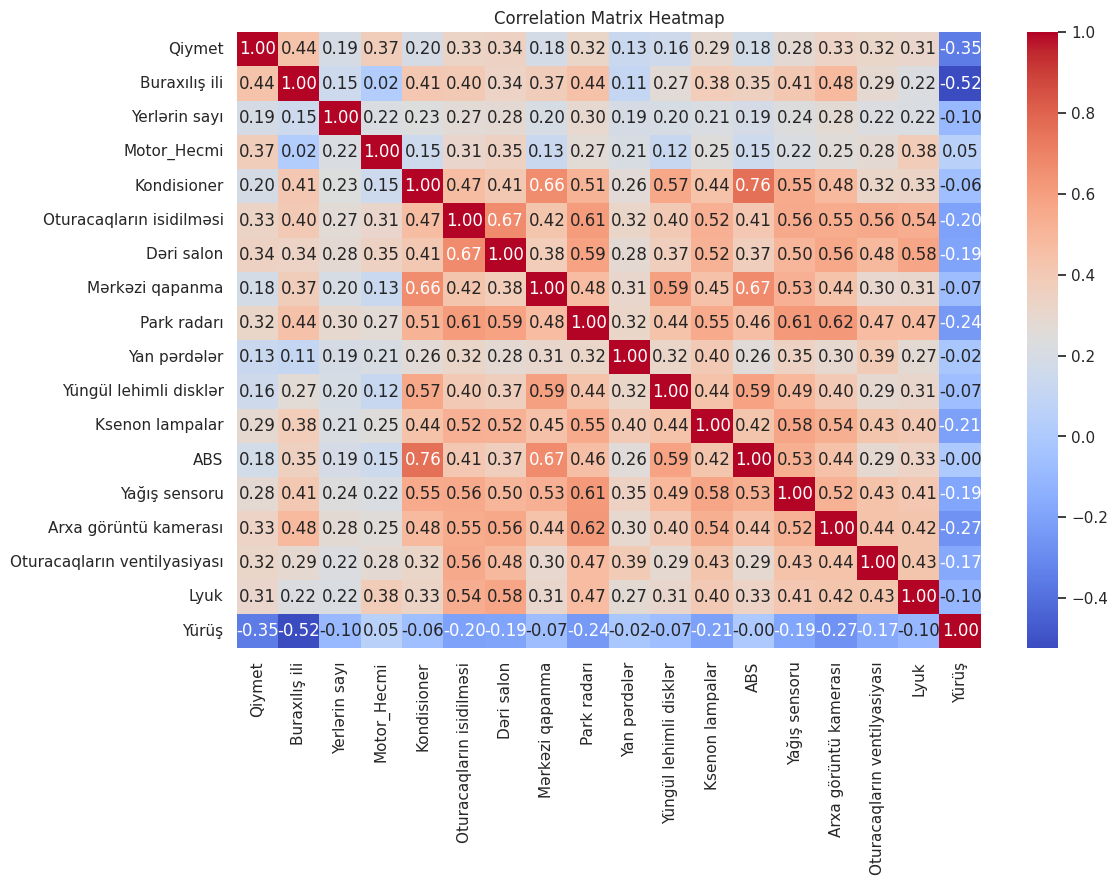

In [139]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = data[numeric_cols].corr()

corr = data.corr(numeric_only=True)["Qiymet"].sort_values(ascending=False)
print("Correlation with Qiymet:\n", corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [140]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Marka', 'Model', 'Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti', 'Hansı bazar üçün yığılıb', 'Yanacaq_Novu']


In [141]:
data['Buraxılış ili'].value_counts()

,count
Buraxılış ili,
2012,675
2013,673
2008,667
2014,600
2022,563
...,...
1938,1
1970,1
1957,1


In [142]:
import datetime

current_year = datetime.datetime.now().year
data["Car_Age"] = current_year - data["Buraxılış ili"]

In [143]:
data = data[data["Car_Age"] <= 50]

In [144]:
data

,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Sürətlər qutusu,Ötürücü,Vəziyyəti,Hansı bazar üçün yığılıb,...,Yan pərdələr,Yüngül lehimli disklər,Ksenon lampalar,ABS,Yağış sensoru,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk,Yürüş,Car_Age
0,13500.0,Opel,Vectra,2000,Hetçbek,Göy,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",Avropa,...,1,1,1,1,0,0,0,0,370000.0,25
1,39950.0,Toyota,Corolla,2023,Sedan,Mavi,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,...,1,1,1,1,1,1,1,0,0.0,2
2,33200.0,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Avropa,...,1,1,1,1,1,1,1,1,168636.0,12
3,17000.0,Ford,Fusion,2015,Sedan,Göy,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",unknown,...,1,1,1,1,1,1,0,0,120873.0,10
4,61200.0,Toyota,RAV4,2022,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",unknown,...,0,1,1,1,1,1,0,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,BMW,528,2016,Sedan,Qara,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",unknown,...,1,1,1,1,1,0,0,1,100000.0,9
9996,166600.0,Land Rover,Range Rover,2019,Offroader / SUV,Qara,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",unknown,...,1,1,1,1,1,1,1,1,84000.0,6
9997,9800.0,Chevrolet,Lacetti,2007,Sedan,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Koreya,...,0,1,0,1,0,1,0,0,299785.0,18
9998,17800.0,Hyundai,Tucson,2007,Offroader / SUV,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Avropa,...,0,1,1,1,1,1,1,0,181500.0,18


In [145]:
data.drop(columns=["Buraxılış ili"], inplace=True)

In [147]:
data.to_csv('clean_dataset.csv', index=False)
print("File 'clean_dataset.csv' saved.")


File 'clean_dataset.csv' saved.


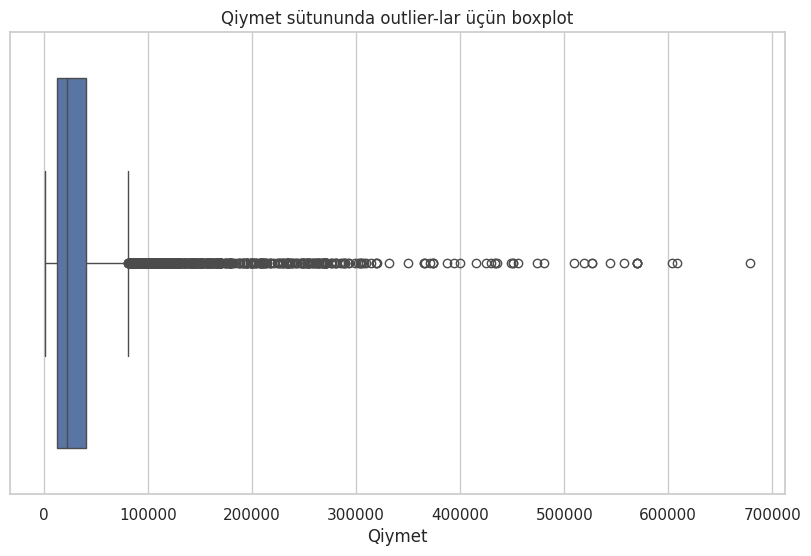

In [150]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Qiymet'])
plt.title('Qiymet sütununda outlier-lar üçün boxplot')
plt.show()

In [151]:
from scipy import stats

z_scores = stats.zscore(data['Qiymet'])
outliers_z = data[(np.abs(z_scores) > 3)]
print(f"Z-score ilə tapılan outlier sayi: {outliers_z.shape[0]}")


Z-score ilə tapılan outlier sayi: 199


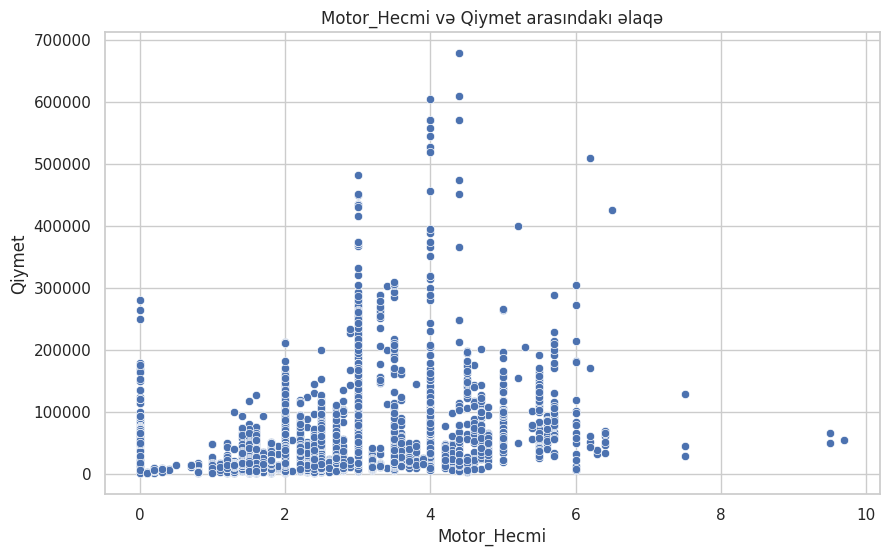

In [152]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Motor_Hecmi'], y=data['Qiymet'])
plt.title('Motor_Hecmi və Qiymet arasındakı əlaqə')
plt.show()

In [153]:
from scipy.spatial import distance

def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - np.mean(data, axis=0)
    if cov is None:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

features = ['Qiymet', 'Motor_Hecmi', 'Yürüş']
data_features = data[features]
data_features = data_features.dropna()

m_dist = mahalanobis(x=data_features, data=data_features)
threshold = np.percentile(m_dist, 99)  # üst 1% outlier kimi qəbul edək
outliers_multi = data_features[m_dist > threshold]
print(f"Çoxölçülü outlier sayi: {outliers_multi.shape[0]}")

Çoxölçülü outlier sayi: 99


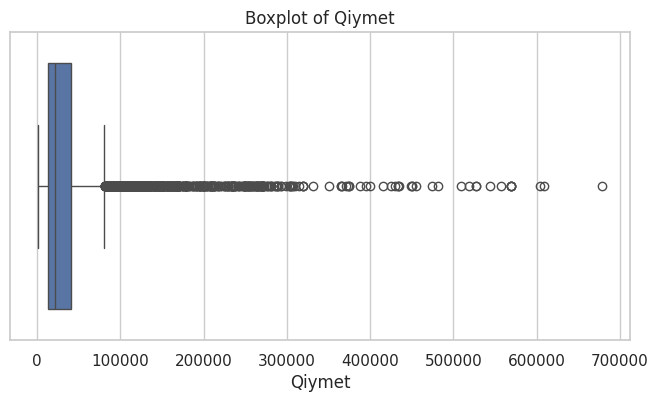

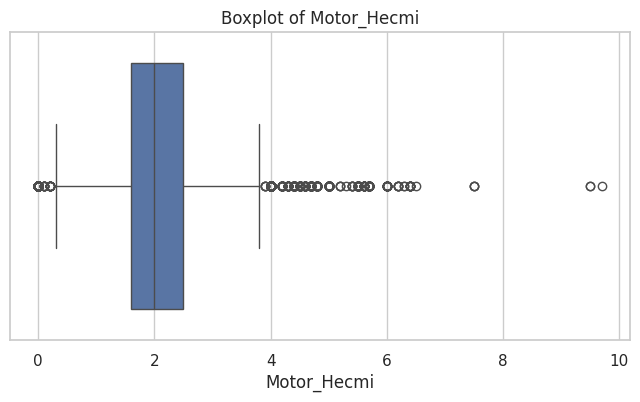

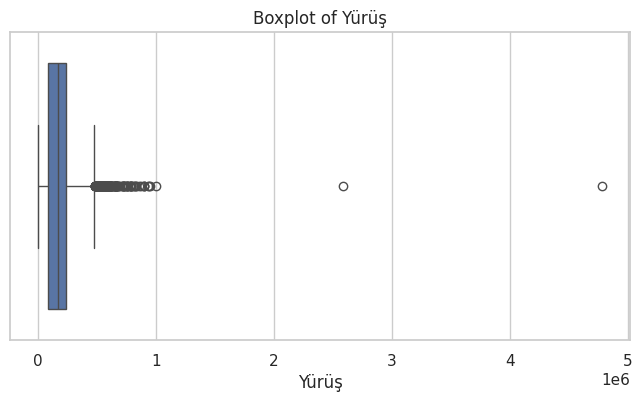

In [154]:
features = ['Qiymet', 'Motor_Hecmi', 'Yürüş']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [155]:
data = data.copy()

lower_limit = data['Qiymet'].quantile(0.01)
upper_limit = data['Qiymet'].quantile(0.99)

data.loc[:, 'Qiymet'] = data['Qiymet'].clip(lower_limit, upper_limit)

print(data['Qiymet'].describe())

count      9855.000000
mean      35041.444871
std       40985.308516
min        2800.000000
25%       12700.000000
50%       21800.000000
75%       39950.000000
max      254462.800000
Name: Qiymet, dtype: float64


In [156]:
print("Old min:", data['Qiymet'].min())
print("Old max:", data['Qiymet'].max())

Old min: 2800.0
Old max: 254462.7999999994


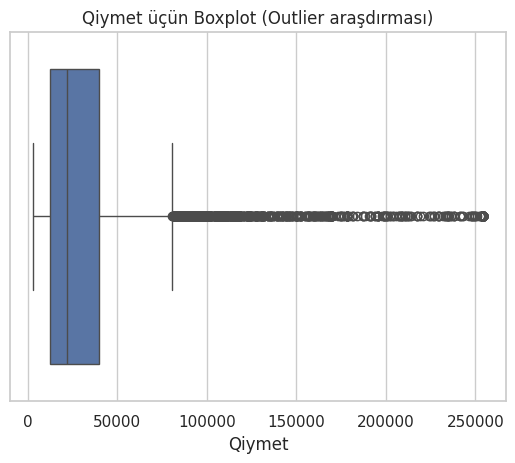

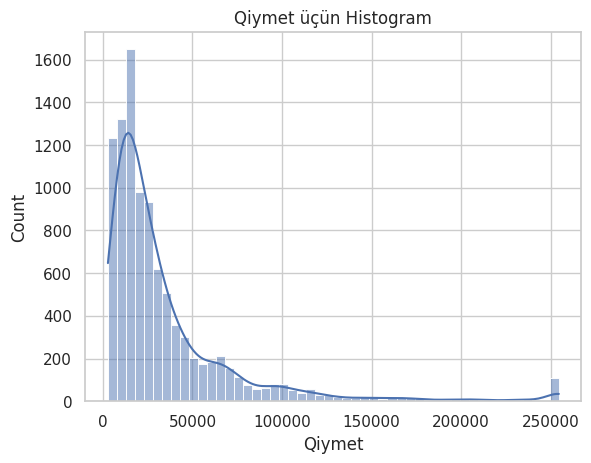

In [157]:
sns.boxplot(x=data['Qiymet'])
plt.title("Qiymet üçün Boxplot (Outlier araşdırması)")
plt.show()

sns.histplot(data['Qiymet'], bins=50, kde=True)
plt.title("Qiymet üçün Histogram")
plt.show()

In [158]:
print(data['Qiymet'].quantile(0.99))  # 99% qiymət bundan aşağıdır

254293.88799999945


In [160]:
categorical_cols = [
    "Ban növü",
    "Rəng",
    "Sürətlər qutusu",
    "Ötürücü",
    "Vəziyyəti",
    "Hansı bazar üçün yığılıb",
    "Yanacaq_Novu"
]

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [161]:
data

,Qiymet,Marka,Model,Ban növü,Rəng,Sürətlər qutusu,Ötürücü,Vəziyyəti,Hansı bazar üçün yığılıb,Yerlərin sayı,...,Yan pərdələr,Yüngül lehimli disklər,Ksenon lampalar,ABS,Yağış sensoru,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk,Yürüş,Car_Age
0,13500.0,Opel,Vectra,Hetçbek,Göy,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",Avropa,5.0,...,1,1,1,1,0,0,0,0,370000.0,25
1,39950.0,Toyota,Corolla,Sedan,Mavi,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,5.0,...,1,1,1,1,1,1,1,0,0.0,2
2,33200.0,Hyundai,Santa Fe,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Avropa,7.0,...,1,1,1,1,1,1,1,1,168636.0,12
3,17000.0,Ford,Fusion,Sedan,Göy,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",unknown,5.0,...,1,1,1,1,1,1,0,0,120873.0,10
4,61200.0,Toyota,RAV4,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",unknown,5.0,...,0,1,1,1,1,1,0,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,BMW,528,Sedan,Qara,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",unknown,5.0,...,1,1,1,1,1,0,0,1,100000.0,9
9996,166600.0,Land Rover,Range Rover,Offroader / SUV,Qara,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",unknown,6.0,...,1,1,1,1,1,1,1,1,84000.0,6
9997,9800.0,Chevrolet,Lacetti,Sedan,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Koreya,5.0,...,0,1,0,1,0,1,0,0,299785.0,18
9998,17800.0,Hyundai,Tucson,Offroader / SUV,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",Avropa,5.0,...,0,1,1,1,1,1,1,0,181500.0,18


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9855 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Qiymet                        9855 non-null   float64
 1   Marka                         9855 non-null   object 
 2   Model                         9855 non-null   object 
 3   Ban növü                      9855 non-null   object 
 4   Rəng                          9855 non-null   object 
 5   Sürətlər qutusu               9855 non-null   object 
 6   Ötürücü                       9855 non-null   object 
 7   Vəziyyəti                     9855 non-null   object 
 8   Hansı bazar üçün yığılıb      9855 non-null   object 
 9   Yerlərin sayı                 9855 non-null   float64
 10  Motor_Hecmi                   9855 non-null   float64
 11  Yanacaq_Novu                  9855 non-null   object 
 12  Kondisioner                   9855 non-null   int64  
 13  Oturacaq

In [163]:
extra_columns = [
    'ABS', 'Dəri salon', 'Kondisioner', 'Lyuk',
    'Oturacaqların isidilməsi', 'Oturacaqların ventilyasiyası',
    'Park radarı', 'Yan pərdələr', 'Yağış sensoru',
    'Yüngül lehimli disklər', 'Arxa görüntü kamerası'
]

data[extra_columns] = data[extra_columns].fillna(0)

In [171]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()

corr_target = corr_matrix['Qiymet'].sort_values(ascending=False)

print(corr_target)

Qiymet                          1.000000
Motor_Hecmi                     0.408502
Dəri salon                      0.392764
Arxa görüntü kamerası           0.392592
Oturacaqların isidilməsi        0.390235
Park radarı                     0.375083
Oturacaqların ventilyasiyası    0.361346
Lyuk                            0.359801
Yağış sensoru                   0.335151
Ksenon lampalar                 0.333296
Kondisioner                     0.236211
Yerlərin sayı                   0.235852
Mərkəzi qapanma                 0.216942
ABS                             0.215806
Yüngül lehimli disklər          0.189750
Yan pərdələr                    0.149556
Yürüş                          -0.398618
Car_Age                        -0.547016
Name: Qiymet, dtype: float64


Modelling

In [174]:
selected_numeric_features = [
    'Motor_Hecmi', 'Dəri salon', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi',
    'Park radarı', 'Oturacaqların ventilyasiyası', 'Lyuk', 'Yağış sensoru',
    'Ksenon lampalar', 'Car_Age', 'Yürüş'
]

categorical_features = ['Marka', 'Model', 'Ban növü', 'Rəng', 'Sürətlər qutusu',
                        'Ötürücü', 'Vəziyyəti', 'Hansı bazar üçün yığılıb', 'Yanacaq_Novu']

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


X = data[selected_numeric_features + categorical_features]
y = data['Qiymet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selected_numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 4240.4209372764
R² Score: 0.9330775054248097


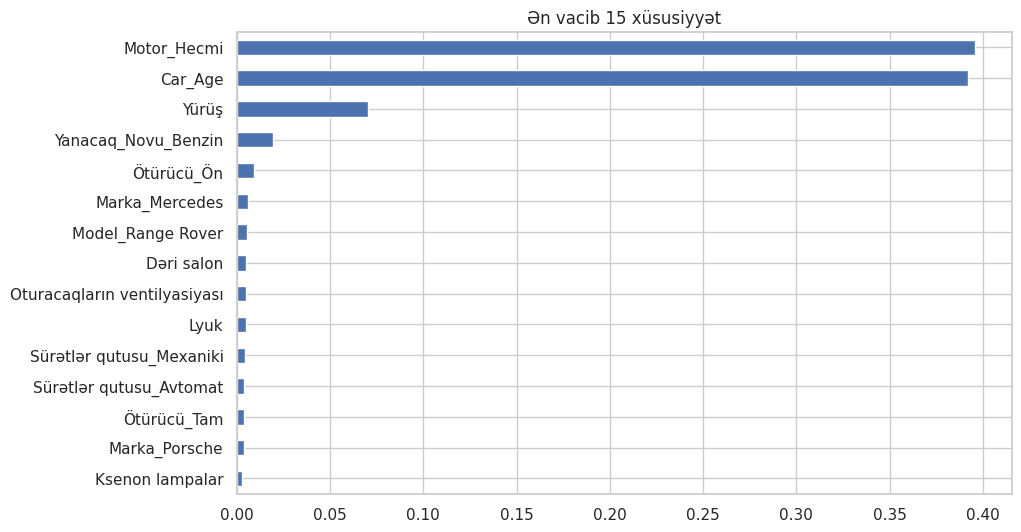

In [178]:
# Feature importance
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].transformers_[0][2] + \
                list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(15).plot(kind='barh', figsize=(10, 6), title='Ən vacib 15 xüsusiyyət')
plt.gca().invert_yaxis()
plt.show()


In [179]:
comparison = pd.DataFrame({'Real Price': y_test.values, 'Predicted Price': y_pred})
print(comparison.head())

   Real Price  Predicted Price
0      8900.0         9975.990
1     11600.0        11416.610
2     14500.0        14602.000
3     21900.0        21362.000
4     62900.0        69396.846


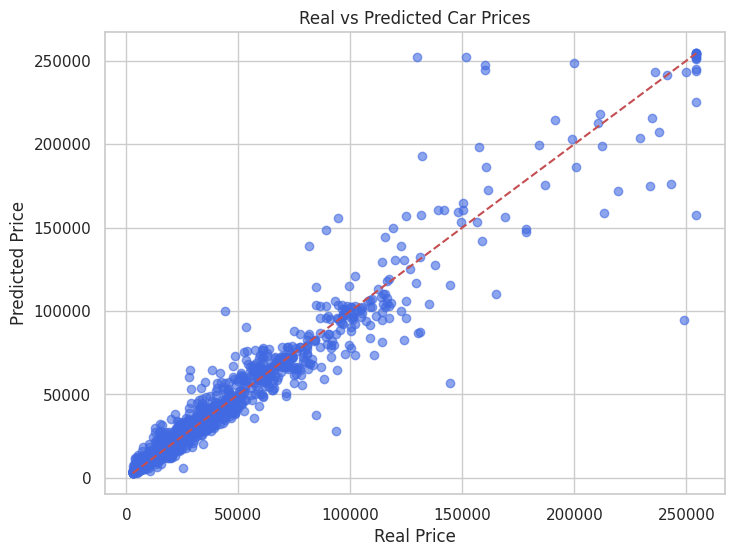

In [180]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title("Real vs Predicted Car Prices")
plt.grid(True)
plt.show()


In [183]:
errors = np.abs(y_test - y_pred)
top_errors = errors.sort_values(ascending=False).head(10)
print(data.loc[top_errors.index][['Qiymet', 'Marka', 'Model', 'Yürüş', 'Car_Age']])

        Qiymet       Marka           Model    Yürüş  Car_Age
6702  249143.5    Mercedes         EQV 300      0.0        2
4130  129900.0  Volkswagen         Touareg      0.0        3
590   151500.0         BMW             740      0.0        2
8503  254462.8    Mercedes  S 350 d 4Matic  16332.0        4
1016  144500.0     McLaren         MP4-12C  39000.0       12
7173  160140.0        Jeep  Grand Cherokee      0.0        3
2043  160140.0        Jeep  Grand Cherokee      0.0        3
8336  243098.3    Mercedes         GLS 580  54000.0        5
3682   93500.0    Mercedes           E 500  31500.0       21
4780   94421.4    Mercedes        C 63 AMG  45000.0        8


In [186]:
data['log_price'] = np.log1p(data['Qiymet'])

In [188]:
data['Is_Luxury'] = data['Qiymet'].apply(lambda x: 1 if x > 100000 else 0)

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

MAE: 4240.42
MSE: 102697424.44
RMSE: 10133.97
R-squared: 0.9331


In [196]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np


y = data['Qiymet']
X = data[selected_numeric_features + categorical_features]
luxury_flag = data['Is_Luxury']  # 0 və 1 dəyərlər

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mae_list = []
r2_list = []

for train_idx, test_idx in skf.split(X, luxury_flag):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # One-hot encoding və ya pipeline istifadə olunmalıdır burada (qısa yol üçün bu addım sadələşdirilib)
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)

    mae_list.append(mean_absolute_error(y_test, preds))
    r2_list.append(r2_score(y_test, preds))

print(f"Stratified MAE: {np.mean(mae_list):.2f}")
print(f"Stratified R²: {np.mean(r2_list):.4f}")


Stratified MAE: 4209.78
Stratified R²: 0.9408


In [201]:
X_encoded = X_encoded.astype(float)

In [204]:

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import shap

selected_numeric_features = [
    'Motor_Hecmi', 'Dəri salon', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi',
    'Park radarı', 'Oturacaqların ventilyasiyası', 'Lyuk', 'Yağış sensoru',
    'Ksenon lampalar', 'Car_Age', 'Yürüş'
]

categorical_features = ['Marka', 'Model', 'Ban növü', 'Rəng', 'Sürətlər qutusu',
                        'Ötürücü', 'Vəziyyəti', 'Hansı bazar üçün yığılıb', 'Yanacaq_Novu']

X_encoded = pd.get_dummies(X)
X_encoded = X_encoded.astype(float)


In [207]:

data['Is_Luxury'] = (data['Qiymet'] > 100000).astype(int)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in skf.split(X_encoded, data['Is_Luxury']):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    break


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Stratified MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("Stratified R²:", round(r2_score(y_test, y_pred), 4))


Stratified MAE: 4166.69
Stratified R²: 0.9434


100%|===================| 9844/9855 [14:05<00:00]       

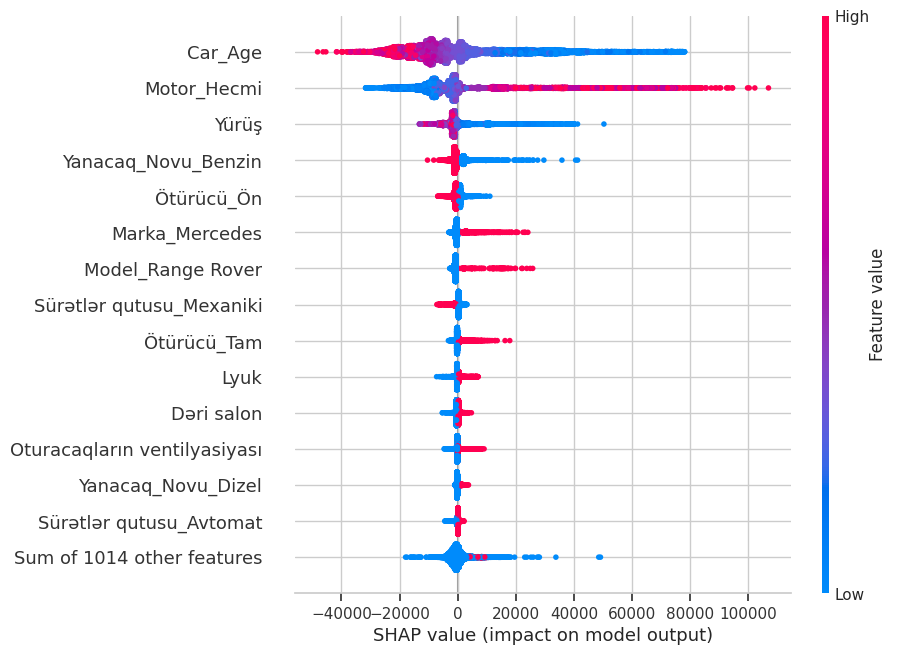

In [209]:
explainer = shap.Explainer(rf_model, X_encoded)
shap_values = explainer(X_encoded, check_additivity=False)

shap.plots.beeswarm(shap_values, max_display=15)

In [1]:
import pickle

In [4]:

with open("model.pkl", "wb") as f:
    pickle.dump(rf_model, f)


with open("shap_values.pkl", "wb") as f:
    pickle.dump(shap_values, f)


with open("explainer.pkl", "wb") as f:
    pickle.dump(explainer, f)


NameError: name 'rf_model' is not defined

In [ ]:
print("SHAP rows:", len(shap_values[1]))
print("X rows:", X.shape[0])
